In [1]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from azureml.core import Workspace
from azureml.core.run import Run
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [27]:
RANDOM_STATE = 42
MODEL_NAME = "mymodel.pkl"
%matplotlib inline

In [3]:
run = Run.get_context()

In [4]:
data_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)),'data/diabetes.csv')

In [5]:
df = pd.read_csv(data_path)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    float64
 1   SEX     442 non-null    float64
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    float64
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.269723e-16,-8.016463e-16,1.288562e-16,-8.992304e-17,1.296097e-16,-4.563971e-16,3.875733e-16,-3.845592e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [7]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
data = {"train": {"X": X_train, "y": y_train}, "test": {"X": X_test, "y": y_test}}

alphas = np.arange(0.0, 1.0, 0.05)
alpha = alphas[np.random.choice(alphas.shape[0], 1, replace=False)][0]

reg = Ridge(alpha=alpha)
reg.fit(data["train"]["X"], data["train"]["y"])
preds = reg.predict(data["test"]["X"])
mse = mean_squared_error(preds, data["test"]["y"])
print("Alpha is {0:.2f}, and MSE is {1:0.2f}".format(alpha, mse))

print("Logging values")
# run.log("alpha", alpha)
# run.log("mse", mse)

Alpha is 0.55, and MSE is 2931.87
Logging values


<Figure size 1440x360 with 0 Axes>

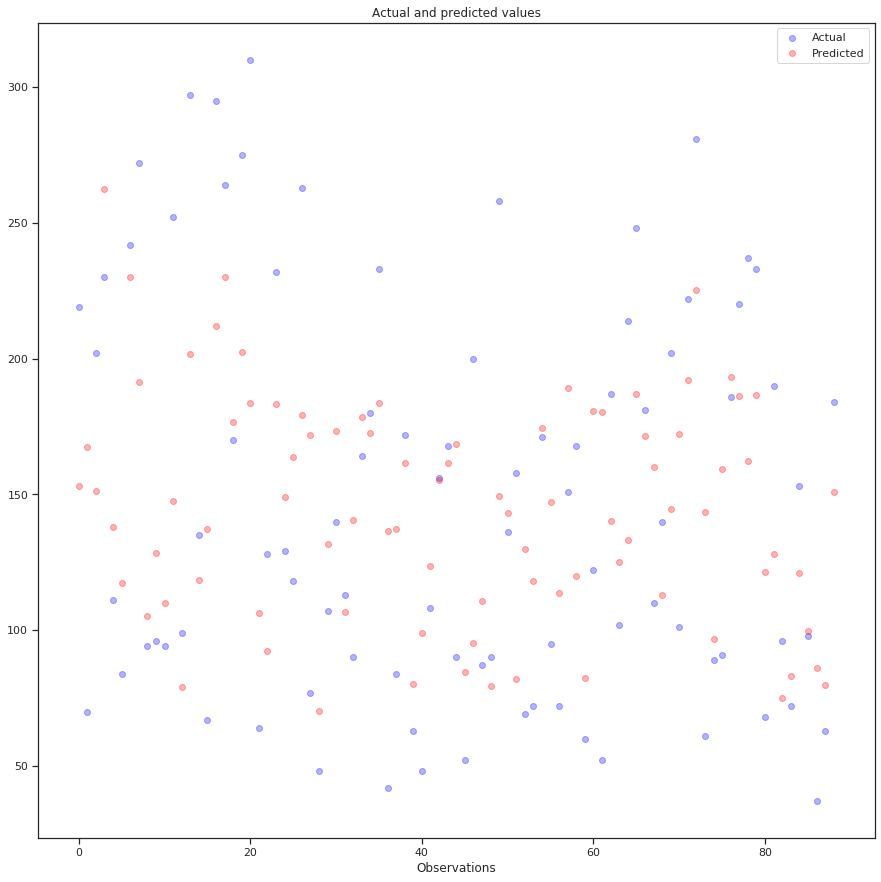

In [37]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [15, 15]
plt.figure(figsize=(20,5))

_, ax = plt.subplots()

ax.scatter(x = range(0, len(data["test"]["y"])), y=data["test"]["y"], c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, len(preds)), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.legend()
plt.show()

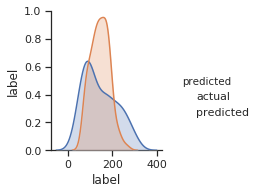

In [38]:
import seaborn as sns
import pandas as pd
sns.set(style="ticks")

dfy = pd.DataFrame()
dfpred = pd.DataFrame()
dfy["label"] = data["test"]["y"]
dfpred["label"] = preds

dfy["predicted"] = "actual"
dfpred["predicted"] = "predicted"

df = pd.concat([dfy, dfpred])
sns.pairplot(df, hue="predicted")